In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df =  pd.read_csv('carvana.csv')
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [261]:
df.describe()

,Year,Miles,Price
count,2.200000e+04,22000.000000,22000.000000
mean,1.946648e+05,54445.697318,20707.285136
std,1.630370e+06,25685.933926,6535.580304
min,2.009000e+03,53.000000,10990.000000
25%,2.014000e+03,35512.000000,16590.000000
50%,2.017000e+03,51890.000000,19590.000000
75%,2.020000e+03,73191.000000,22990.000000
max,2.022350e+07,120167.000000,102990.000000


In [262]:
df.Year.unique()

array([    2018,     2020,     2012,     2019,    20173,     2016,
           2017,     2015,     2014,     2010,    20194,    20165,
           2013,    20133,     2011,  2013500,  2017124,     2021,
           2022,   201650,    20163,    20215,    20113,    20152,
       20141500,   202130,    20204,    20153,  2014500,  2016500,
          20103,    20156,  2017500,   201040,  2013300,  2015200,
        2013150,    20125,    20185,    20166,    20146,    20213,
         202180,   201860,    20184,    20203,    20143,    20144,
         201550,   202050,   202150,    20199,    20219,    20205,
         201730,   202060,  2018500,  2015500,  2010370,   201750,
          20174,   201360,   200970,    20193,    20145,    20164,
          20123,    20176,  2016200,   201560,  2015900,    20161,
        2016900,    20154,    20182,    20157,  2019500,    20183,
          20122,    20129,    20114,  2020150, 20211500,    20135,
          20196,  2014200, 20201500,    20195,    20134,    20

In [263]:
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [264]:
#df['Year_reduced'] = df['Year'].apply(lambda x: int(str(x)[0:4]))

df['Year_reduced']=df['Year'].apply(lambda x: x if (x>=2000 and x<=2030) else np.nan)

df

,Name,Year,Miles,Price,Year_reduced
0,Chevrolet Trax,2018,41946,16990,2018.0
1,GMC Terrain,2020,45328,23990,2020.0
2,Jeep Wrangler,2012,81068,21590,2012.0
3,Jeep Renegade,2019,35372,21590,2019.0
4,BMW X,20173,68992,22990,NaN
...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,2014.0
21996,Dodge Charger,2016,62616,23990,2016.0
21997,Ford Taurus,2013,50345,16990,2013.0
21998,Toyota Corolla Hatchback,2020,27945,23990,2020.0


In [265]:
df.Year_reduced.unique()

array([2018., 2020., 2012., 2019.,   nan, 2016., 2017., 2015., 2014.,
       2010., 2013., 2011., 2021., 2022., 2009., 2023.])

In [266]:
df.dropna(inplace=True)

array([[<AxesSubplot: title={'center': 'Year_reduced'}>]], dtype=object)

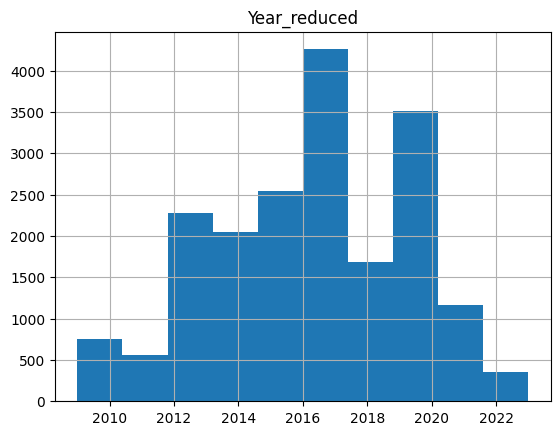

In [267]:
df.hist('Year_reduced')

In [268]:
df[df['Year_reduced']==2023]

,Name,Year,Miles,Price,Year_reduced
5695,Kia Carnival,2023,4457,43590,2023.0
5986,Chevrolet Corvette,2023,2982,94590,2023.0


In [269]:
df.drop(df[df['Year_reduced']>2022].index, axis=0, inplace=True)

In [270]:
df.describe()

,Year,Miles,Price,Year_reduced
count,19147.000000,19147.000000,19147.000000,19147.000000
mean,2016.166136,55342.862328,20284.965112,2016.166136
std,3.001641,25873.025184,6018.927060,3.001641
min,2009.000000,53.000000,10990.000000,2009.000000
25%,2014.000000,35929.000000,16590.000000,2014.000000
50%,2016.000000,53030.000000,18990.000000,2016.000000
75%,2019.000000,74514.000000,22590.000000,2019.000000
max,2022.000000,120167.000000,102990.000000,2022.000000


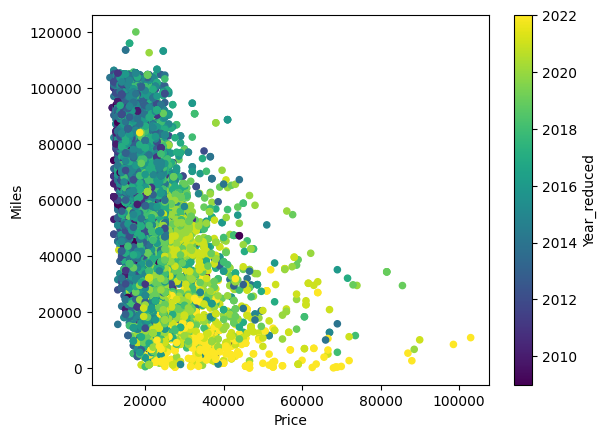

In [271]:
ax2 = df.plot.scatter(x='Price',
                      y='Miles',
                      c='Year_reduced',
                      colormap='viridis')

In [272]:
cormat = df.corr()
cormat_reduced = cormat.drop(['Year']).drop(['Year'], axis=1)
round(cormat_reduced,2)

/tmp/ipykernel_9244/4055011234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


,Miles,Price,Year_reduced
Miles,1.00,-0.49,-0.51
Price,-0.49,1.00,0.50
Year_reduced,-0.51,0.50,1.00


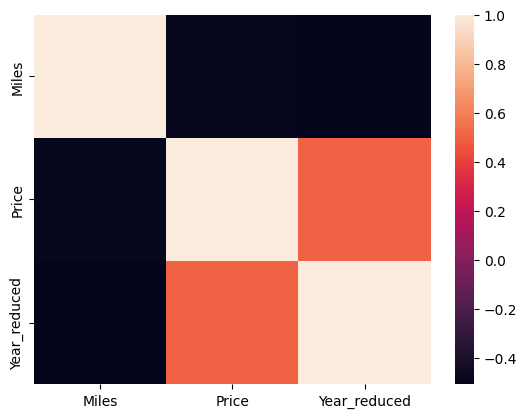

In [273]:
sns.heatmap(cormat_reduced);

In [274]:
df.shape

(19147, 5)

In [275]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [276]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

transformer = ColumnTransformer(transformers=[("num_preprocess", MinMaxScaler(), ["Miles", "Year_reduced"]),
                                ('onehotencoder', ohe, ['Name'])],
                 remainder='passthrough', n_jobs=-1)

In [277]:
msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

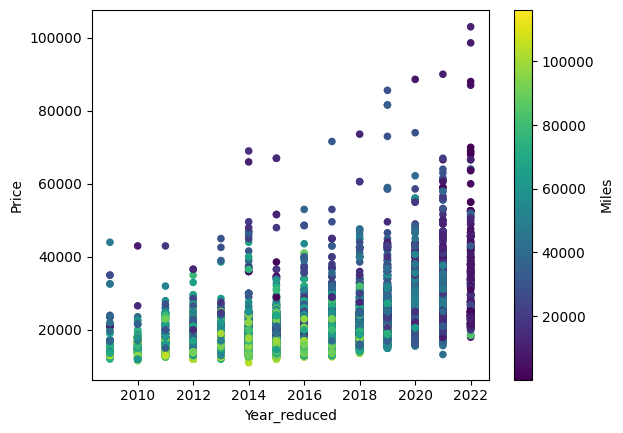

In [278]:
ax11 = train.plot.scatter(x='Year_reduced',
                      y='Price',
                      c='Miles',
                      colormap='viridis')

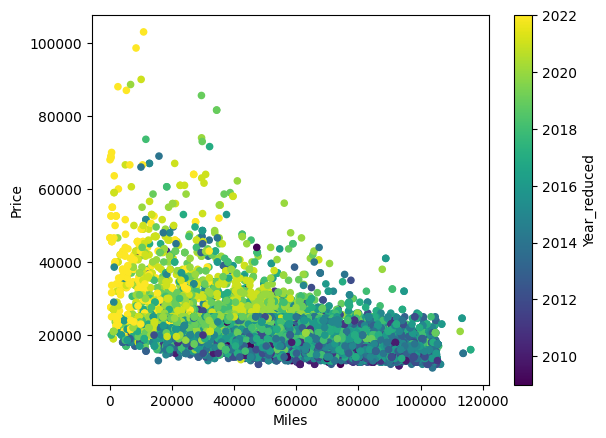

In [279]:
ax12 = train.plot.scatter(x='Miles',
                      y='Price',
                      c='Year_reduced',
                      colormap='viridis')

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
X = df.drop(['Price'],axis=1) 
y = df[['Price']]

In [282]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

In [283]:
from sklearn import linear_model

In [284]:
x_train = transformer.fit_transform(X_train)
x_test = transformer.transform(X_test)

/home/mohsen/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [285]:
x_train.shape,y_train.shape

((15317, 337), (15317, 1))

In [286]:
mlr = linear_model.LinearRegression()

In [287]:
mlr.fit(x_train,y_train.values.ravel())
print('coefficients : ', mlr.coef_)

coefficients :  [-8.53216705e+03  6.57561306e+01  4.39882263e+03  2.69424352e+03
  2.95423278e+03  1.67070577e+03  1.79579349e+03  1.00298386e+03
  4.49632774e+03  4.83579437e+03  9.59783895e+03  5.73997409e+03
  4.37743568e+04  2.06988251e+03  4.12654845e+03 -3.01145270e+03
 -2.46850810e+03  1.03392112e+03 -3.58945144e+01 -1.58726346e+03
 -1.07320084e+03 -1.79574459e+03 -2.35732666e+03  1.06076352e+03
  1.81938759e+03  1.14427598e+02  7.18374510e+03  3.69617281e+04
  2.24023910e+03  2.41287308e+03  3.01882302e+03 -1.47181803e+03
  3.17332291e+03 -2.39063836e+03  8.11388207e+02  6.46379016e+03
  1.72719233e+03  2.55568391e+04 -4.39555087e+03 -5.15935658e+03
 -2.99230525e+03 -6.96003591e+02 -3.61304613e+03 -2.59970968e+03
 -2.77399014e+03 -5.56299596e+03 -7.52084762e+03 -5.87720206e+03
  3.10006080e+04  1.17576899e+04 -1.69085792e+03  4.17194584e+03
 -4.86265725e+03 -5.37790815e+02  3.18730134e+03 -3.16734066e+03
  4.27496179e+02  2.53206518e+03 -2.14267359e+03  7.55067429e+03
  3.97529

In [288]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [292]:
y_pred = mlr.predict(x_test)
    
print("R2 Score : %.4f" %r2_score(y_test,y_pred))
print("Mean Absolute Error Score : %.4f" %mean_absolute_error(y_test,y_pred))
print("Mean Sqaured Error Score : %.4f" %mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: %.4f" %mean_squared_error(y_test,y_pred, squared=False))


R2 Score : 0.8609
Mean Absolute Error Score : 1248.2882
Mean Sqaured Error Score : 5131456.2407
Root Mean Squared Error: 2265.2718
